In [179]:
import CalculatedFieldSubroutines as cfs

#

import numpy as np

import pandas as pd

#

import matplotlib.pyplot as plt

from pandasgui import show

#

import warnings

#

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

In [180]:
warnings.filterwarnings( 'ignore' )

In [181]:
x1 = np.random.normal( 1, 0.3, 1000 )

x2 = np.random.normal( -1, 0.3, 1000 )

x3 = np.random.normal( 0, 0.3, 1000 )

x = np.append( x1, x2 )

x = np.append( x, x3 )

#

y1 = np.random.normal( 1, 0.3, 1000 )

y2 = np.random.normal( 1, 0.3, 1000 )

y3 = np.random.normal( -np.sqrt( 2 ), 0.3, 1000 )

y = np.append( y1, y2 )

y = np.append( y, y3 )

#

X_df = pd.DataFrame()

X_df[ 'x' ] = x

X_df[ 'y' ] = y

In [182]:
scaler = StandardScaler()

X_scaler = scaler.fit( X_df )

X_scaled = scaler.transform( X_df )

In [183]:
def make_elbow_plot( df, n_clusters_range ):

    min_num_of_clusters = n_clusters_range[ 0 ]

    max_num_of_clusters = n_clusters_range[ 1 ]

    num_of_clusters_array = np.array( [] )

    inertia_array = np.array( [] )

    silhouette_score_array = np.array( [] )

    for num_of_clusters in range( min_num_of_clusters, max_num_of_clusters ):

        num_of_clusters_array = np.append( num_of_clusters_array, num_of_clusters )

        kmeans_model = KMeans( n_clusters = num_of_clusters, 
                               init = 'k-means++', 
                               n_init = 10, 
                               max_iter = 300,
                               random_state = 0 )

        df_kmeans_clusters = kmeans_model.fit_predict( df )

        inertia = kmeans_model.inertia_

        inertia_array = np.append( inertia_array, inertia )

        silhouette = silhouette_score( df, df_kmeans_clusters )

        silhouette_score_array = np.append( silhouette_score_array, silhouette )

    plt.plot( num_of_clusters_array, inertia_array, marker = '.', color = 'black' )

    plt.xlim( min_num_of_clusters - 1, max_num_of_clusters + 1 )

    plt.title( 'Elbow Plot' )

    plt.xlabel( 'Number of Clusters' )

    plt.ylabel( 'Inertia' )

    plt.show()

    max_silhouette_score_cluster_num = int( np.argmax( silhouette_score_array ) ) + min_num_of_clusters

    return silhouette_score_array, max_silhouette_score_cluster_num

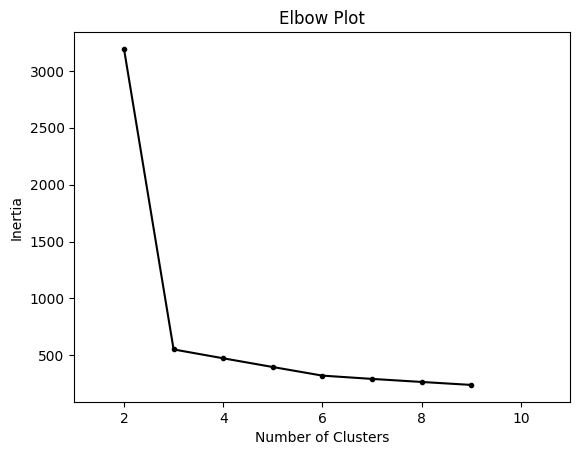

In [184]:
silhouette_score_array, max_silhouette_score_cluster_num = make_elbow_plot( X_scaled, ( 2, 10 ) )

In [185]:
print( silhouette_score_array )

print( max_silhouette_score_cluster_num )

[0.52428879 0.75575372 0.62020317 0.4856091  0.36118569 0.35509639
 0.3413123  0.32921214]
3


In [187]:
num_of_clusters = 3

kmeans_model = KMeans( n_clusters = num_of_clusters, 
                       init = 'k-means++', 
                       n_init = 10, 
                       max_iter = 300, 
                       random_state = 0 )

X_scaled_kmeans_clusters = kmeans_model.fit_predict( X_scaled )

X_df[ 'cluster_num' ] = X_scaled_kmeans_clusters

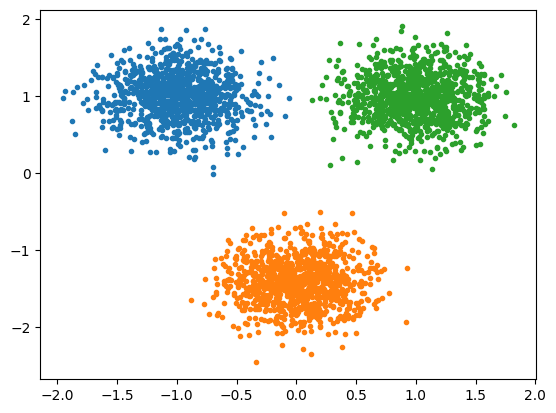

In [189]:
for cluster_num in range( num_of_clusters ):

    x_array = X_df[ X_df.columns[ 0 ] ][ X_df[ 'cluster_num' ] == cluster_num ]

    y_array = X_df[ X_df.columns[ 1 ] ][ X_df[ 'cluster_num' ] == cluster_num ]

    plt.plot( x_array, y_array, marker = '.', ls = '' )

plt.show()